1. Tree-based models (very popular, often best starting point)  
    •	Decision Tree
	•	Random Forest (good baseline, very robust)  
	Gradient Boosting models:  
	•	XGBoost    

In [12]:
import pandas as pd

# Load the balanced datasets with thresholds of 1000 and 2500
df_smote_1000 = pd.read_csv('../Data/df_smote_1000.csv')
df_smote_2500 = pd.read_csv('../Data/df_smote_2500.csv')


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Creating LabelEncoder for the two datasets and encoding the Label column into a numeric form
le_1000 = LabelEncoder()
df_smote_1000['Label_Encoded'] = le_1000.fit_transform(df_smote_1000['Label'])

le_2500 = LabelEncoder()
df_smote_2500['Label_Encoded'] = le_2500.fit_transform(df_smote_2500['Label'])

# Dropping the original and the encoded label columns to separate for the target variable 
x_1000 = df_smote_1000.drop(['Label', 'Label_Encoded'], axis = 1)
y_1000 = df_smote_1000['Label_Encoded']

x_2500 = df_smote_2500.drop(['Label', 'Label_Encoded'], axis = 1)
y_2500 = df_smote_2500['Label_Encoded']

# Creating a StandardScaler and for normalizing the feature values
standard_scaler_1000 = StandardScaler()
x_1000_scaled = standard_scaler_1000.fit_transform(x_1000)

standard_scaler_2500 = StandardScaler()
x_2500_scaled = standard_scaler_2500.fit_transform(x_2500)



In [14]:
from sklearn.model_selection import train_test_split

# Splitting the scaled featured and labels into training and testing sets
x_train_1000, x_test_1000, y_train_1000, y_test_1000 = train_test_split(
    x_1000_scaled, y_1000, test_size = 0.2, random_state = 42, stratify = y_1000)

x_train_2500, x_test_2500, y_train_2500, y_test_2500 = train_test_split(
    x_2500_scaled, y_2500, test_size = 0.2, random_state = 42, stratify = y_2500)


In [15]:
# Getting the attack names from the label encoder for easy visualization
attack_names_1000 = le_1000.classes_
attack_names_2500 = le_2500.classes_

Decision Tree Accuracy (SMOTE 1000): 0.6151470588235294
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.37      0.36      0.37       200
                 BENIGN       0.31      0.33      0.32       200
       BROWSERHIJACKING       0.47      0.44      0.45       200
       COMMANDINJECTION       0.38      0.41      0.39       200
 DDOS-ACK_FRAGMENTATION       0.96      0.97      0.97       200
        DDOS-HTTP_FLOOD       0.81      0.74      0.77       200
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       200
DDOS-ICMP_FRAGMENTATION       0.99      0.98      0.99       200
      DDOS-PSHACK_FLOOD       1.00      0.99      0.99       200
       DDOS-RSTFINFLOOD       1.00      0.99      0.99       200
         DDOS-SLOWLORIS       0.87      0.85      0.86       200
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.45      0.44       200
         DDOS-SYN_FLOOD       0.38      0.39      0.38       200
         DDOS-TCP_FLOOD       0.5

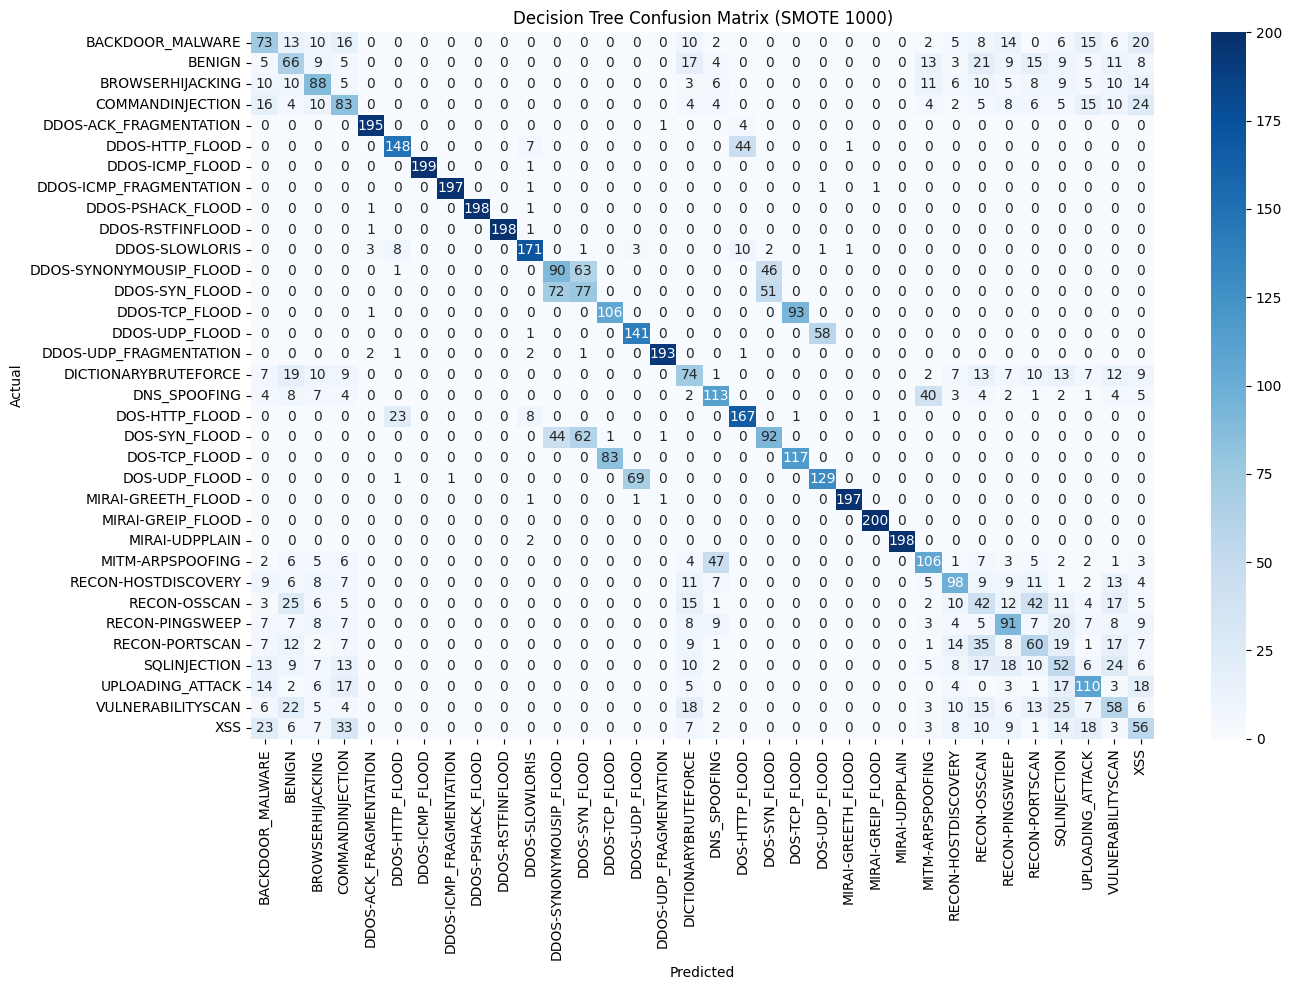

Decision Tree Accuracy (SMOTE 2500): 0.6632941176470588
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.57      0.54      0.55       500
                 BENIGN       0.37      0.37      0.37       500
       BROWSERHIJACKING       0.56      0.56      0.56       500
       COMMANDINJECTION       0.48      0.56      0.52       500
 DDOS-ACK_FRAGMENTATION       0.98      0.99      0.99       500
        DDOS-HTTP_FLOOD       0.80      0.83      0.81       500
        DDOS-ICMP_FLOOD       1.00      0.99      0.99       500
DDOS-ICMP_FRAGMENTATION       0.99      0.99      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.90      0.89      0.89       500
DDOS-SYNONYMOUSIP_FLOOD       0.47      0.47      0.47       500
         DDOS-SYN_FLOOD       0.41      0.42      0.41       500
         DDOS-TCP_FLOOD       0.5

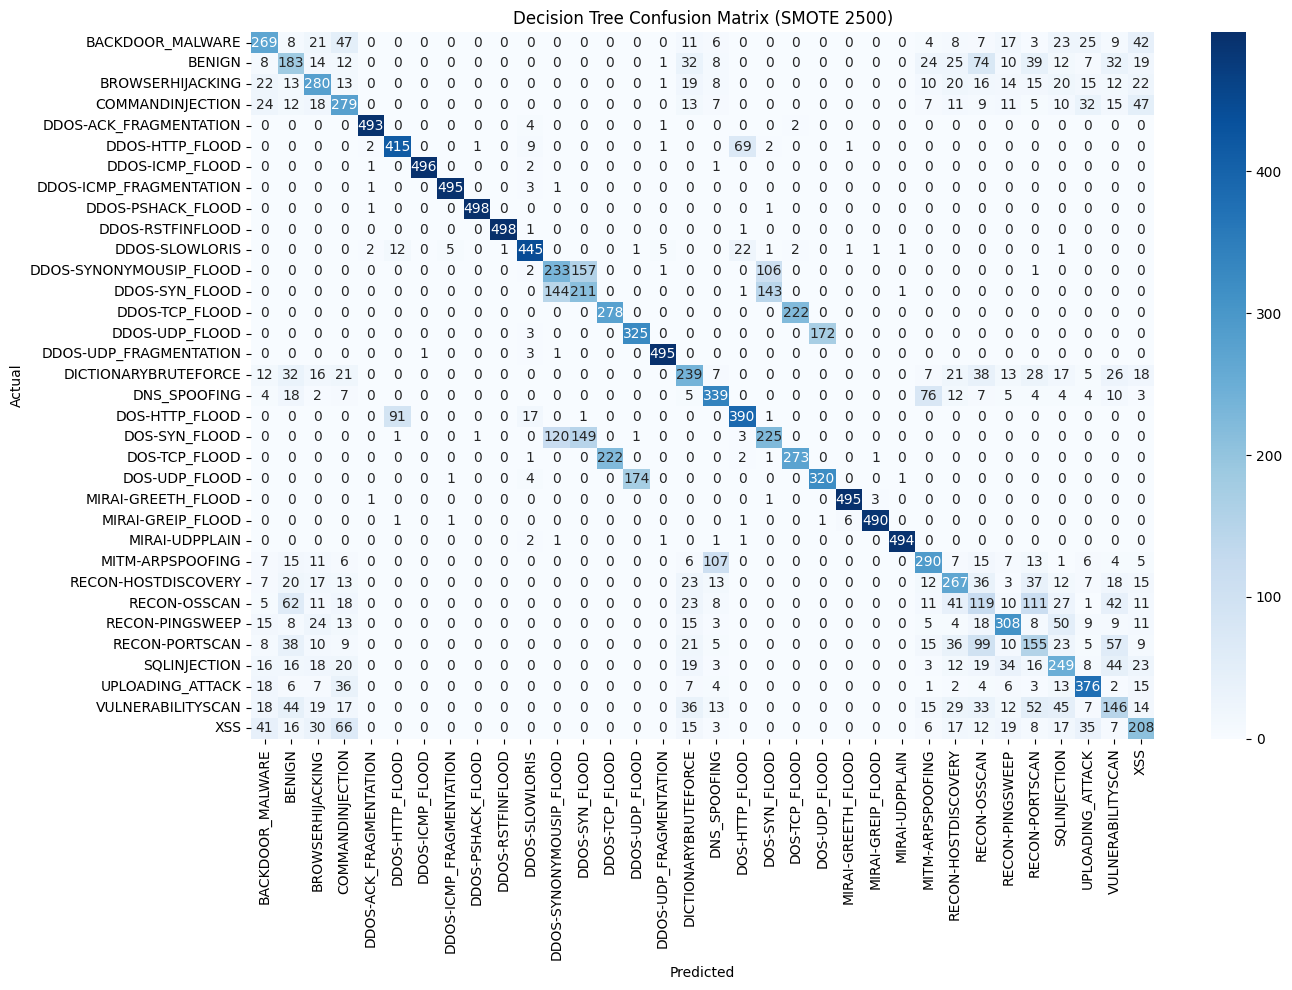

In [ ]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree SMOTE 1000

# Initializing the Decision Tree classifier
decision_tree_1000 = DecisionTreeClassifier(random_state = 42)

# Training the model on the dataset and predicting results based on the testing data
decision_tree_1000.fit(x_train_1000, y_train_1000)
y_pred_decision_tree_1000 = decision_tree_1000.predict(x_test_1000)

# Creating the classification report for the Decision Tree
print(classification_report(y_test_1000, y_pred_decision_tree_1000, target_names=attack_names_1000))

# Creating the confusion matrix for the Decision Tree using sns.heatmap
confusion_matrix_decision_tree_1000 = confusion_matrix(y_test_1000, y_pred_decision_tree_1000)
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_decision_tree_1000, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = attack_names_1000, yticklabels = attack_names_1000)
plt.title("Decision Tree Confusion Matrix (SMOTE 1000)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()



# Decision Tree SMOTE 2500

# Initializing the Decision Tree classifier
decision_tree_2500 = DecisionTreeClassifier(random_state = 42)

# Training the model on the dataset and predicting results based on the testing data
decision_tree_2500.fit(x_train_2500, y_train_2500)
y_pred_decision_tree_2500 = decision_tree_2500.predict(x_test_2500)

# Creating the classification report for the Decision Tree
print(classification_report(y_test_2500, y_pred_decision_tree_2500, target_names = attack_names_2500))

# Creating the confusion matrix for the Decision Tree using sns.heatmap
confusion_matrix_decision_tree_2500 = confusion_matrix(y_test_2500, y_pred_decision_tree_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_decision_tree_2500, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = attack_names_2500, yticklabels = attack_names_2500)
plt.title("Decision Tree Confusion Matrix (SMOTE 2500)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


Random Forest Accuracy (SMOTE 1000): 0.6598529411764706
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.52      0.28      0.37       200
                 BENIGN       0.31      0.60      0.41       200
       BROWSERHIJACKING       0.58      0.42      0.49       200
       COMMANDINJECTION       0.72      0.29      0.41       200
 DDOS-ACK_FRAGMENTATION       0.98      0.99      0.99       200
        DDOS-HTTP_FLOOD       0.93      0.77      0.84       200
        DDOS-ICMP_FLOOD       0.99      0.99      0.99       200
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       200
      DDOS-PSHACK_FLOOD       1.00      0.99      0.99       200
       DDOS-RSTFINFLOOD       1.00      0.99      0.99       200
         DDOS-SLOWLORIS       0.86      0.96      0.91       200
DDOS-SYNONYMOUSIP_FLOOD       0.44      0.70      0.55       200
         DDOS-SYN_FLOOD       0.39      0.29      0.34       200
         DDOS-TCP_FLOOD       0.6

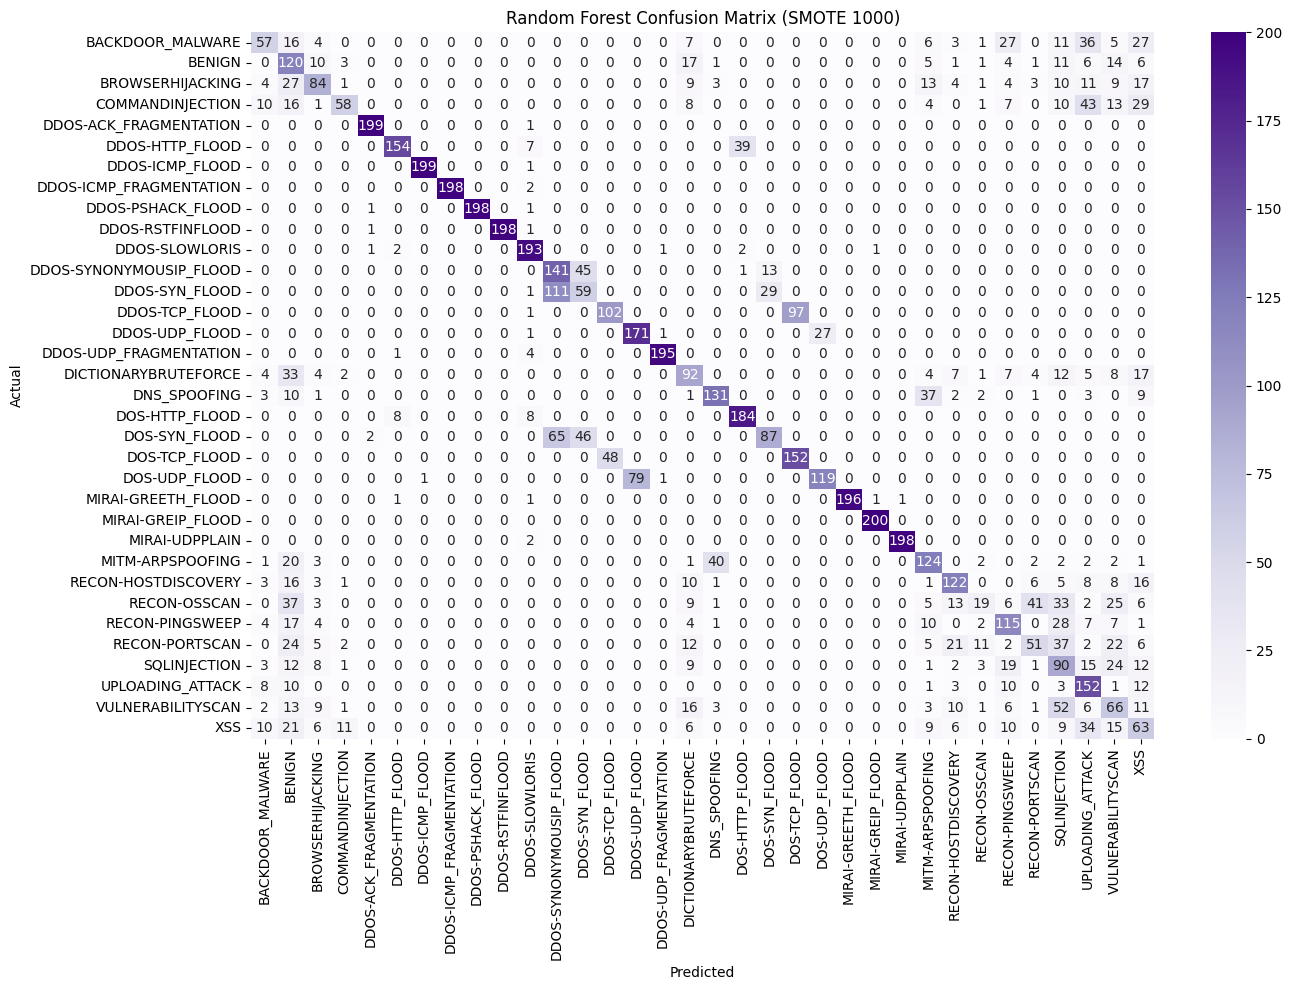

Random Forest Accuracy (SMOTE 2500): 0.687764705882353
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.56      0.40      0.47       500
                 BENIGN       0.34      0.70      0.46       500
       BROWSERHIJACKING       0.67      0.48      0.56       500
       COMMANDINJECTION       0.79      0.36      0.50       500
 DDOS-ACK_FRAGMENTATION       0.99      0.99      0.99       500
        DDOS-HTTP_FLOOD       0.91      0.80      0.85       500
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       500
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.88      0.98      0.93       500
DDOS-SYNONYMOUSIP_FLOOD       0.48      0.83      0.61       500
         DDOS-SYN_FLOOD       0.53      0.29      0.37       500
         DDOS-TCP_FLOOD       0.65

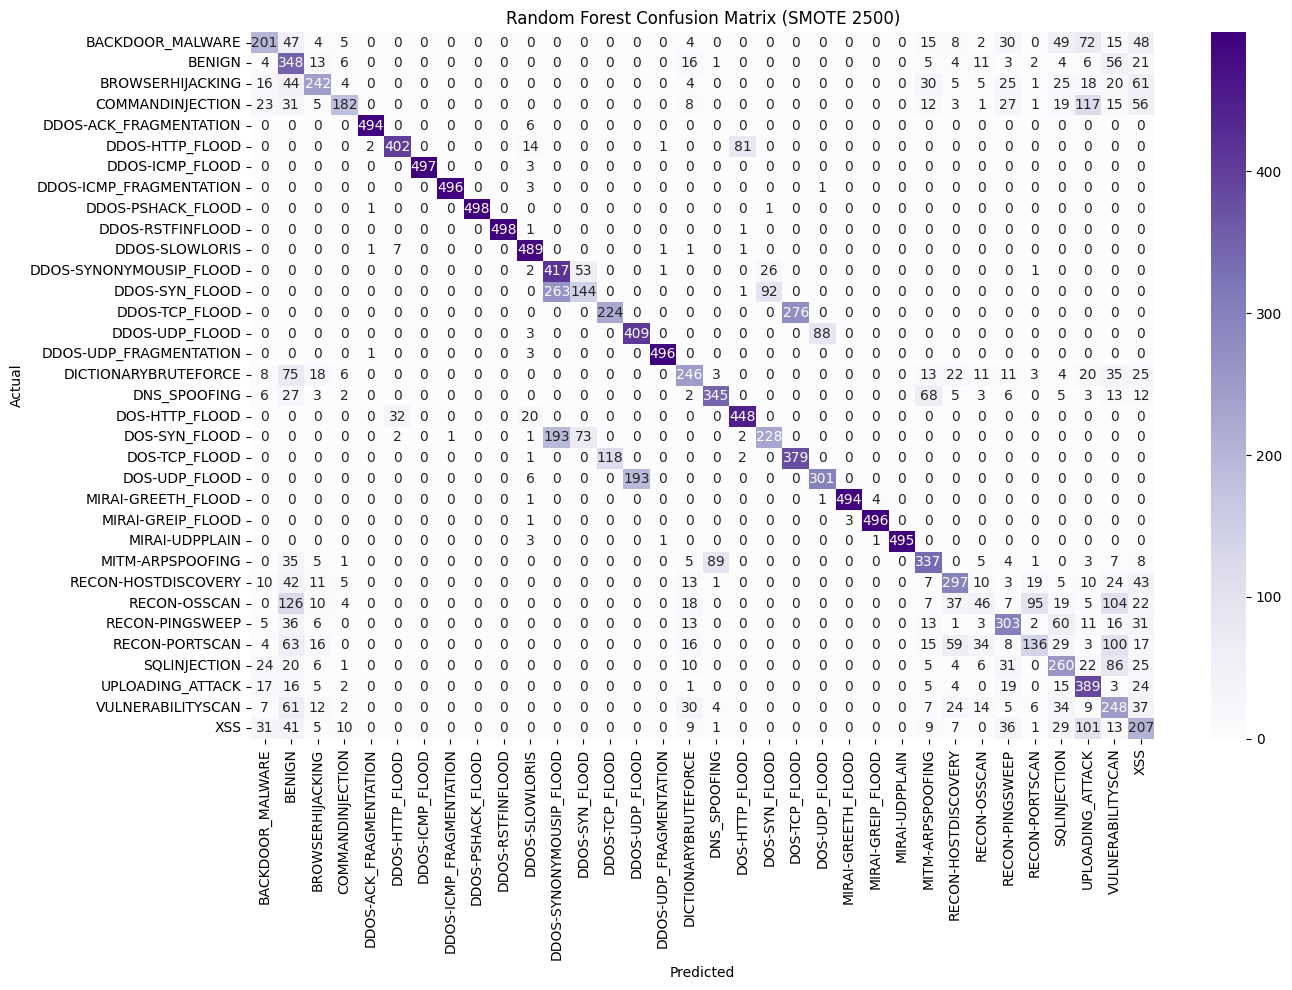

In [ ]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest SMOTE 1000

# Intializing the Random Forest classifier
random_forest_1000 = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 15)

# Training the model on the dataset and prediciting results for the testing set
random_forest_1000.fit(x_train_1000, y_train_1000)
y_pred_random_forest_1000 = random_forest_1000.predict(x_test_1000)

# Creating the classification report for the Random Forest
print(classification_report(y_test_1000, y_pred_random_forest_1000, target_names = attack_names_1000))

# Creating the confusion matrix for the Random Forest using sns.heatmap
confusion_matrix_random_forest_1000 = confusion_matrix(y_test_1000, y_pred_random_forest_1000)
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_random_forest_1000, annot = True, fmt = 'd', cmap ='Purples',
            xticklabels = attack_names_1000, yticklabels = attack_names_1000)
plt.title('Random Forest Confusion Matrix (SMOTE 1000)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


# Random Forest SMOTE 2500

# Intializing the Random Forest classifier
random_forest_2500 = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 15)

# Training the model on the dataset and prediciting results for the testing set
random_forest_2500.fit(x_train_2500, y_train_2500)
y_pred_random_forest_2500 = random_forest_2500.predict(x_test_2500)

# Creating the classification report for the Random Forest
print(classification_report(y_test_2500, y_pred_random_forest_2500, target_names = attack_names_2500))

# Creating the confusion matrix for the Random Forest using sns.heatmap
confusion_matrix_random_forest_2500 = confusion_matrix(y_test_2500, y_pred_random_forest_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_random_forest_2500, annot = True, fmt = 'd', cmap = 'Purples',
            xticklabels = attack_names_2500, yticklabels = attack_names_2500)
plt.title('Random Forest Confusion Matrix (SMOTE 2500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


XGBoost (SMOTE 1000) Accuracy: 0.6730882352941177
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.55      0.51      0.53       200
                 BENIGN       0.44      0.53      0.48       200
       BROWSERHIJACKING       0.47      0.47      0.47       200
       COMMANDINJECTION       0.41      0.41      0.41       200
 DDOS-ACK_FRAGMENTATION       0.97      0.99      0.98       200
        DDOS-HTTP_FLOOD       0.91      0.81      0.86       200
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       200
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       200
      DDOS-PSHACK_FLOOD       1.00      0.98      0.99       200
       DDOS-RSTFINFLOOD       1.00      0.99      0.99       200
         DDOS-SLOWLORIS       0.90      0.97      0.93       200
DDOS-SYNONYMOUSIP_FLOOD       0.43      0.54      0.48       200
         DDOS-SYN_FLOOD       0.34      0.30      0.32       200
         DDOS-TCP_FLOOD       0.59     

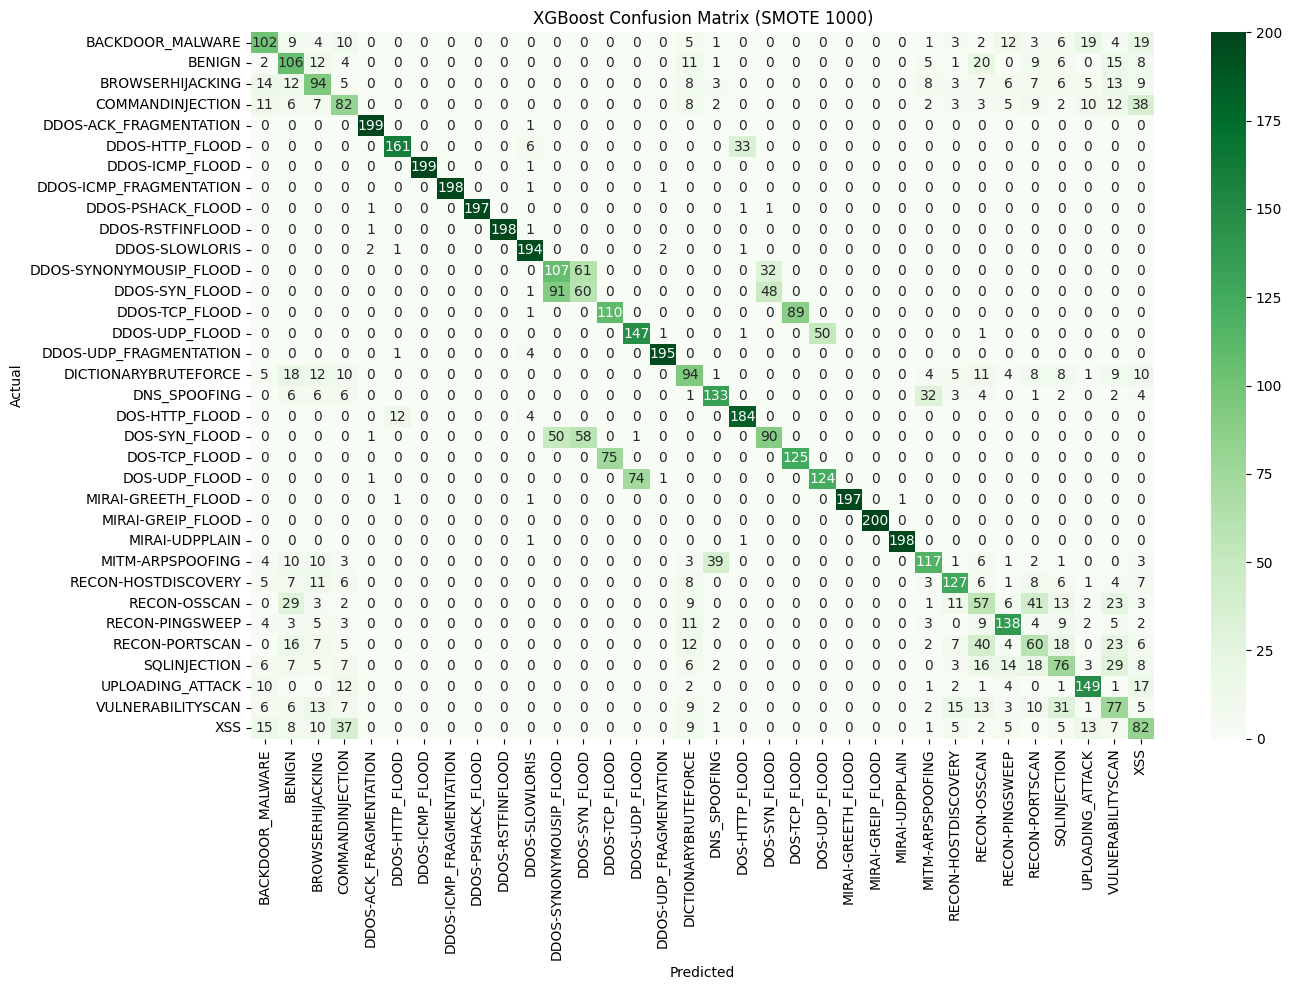

XGBoost (SMOTE 2500) Accuracy: 0.7410588235294118
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.77      0.79      0.78       500
                 BENIGN       0.46      0.61      0.52       500
       BROWSERHIJACKING       0.73      0.72      0.73       500
       COMMANDINJECTION       0.75      0.71      0.73       500
 DDOS-ACK_FRAGMENTATION       1.00      0.99      0.99       500
        DDOS-HTTP_FLOOD       0.89      0.85      0.87       500
        DDOS-ICMP_FLOOD       1.00      0.99      1.00       500
DDOS-ICMP_FRAGMENTATION       1.00      0.99      0.99       500
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00       500
       DDOS-RSTFINFLOOD       1.00      1.00      1.00       500
         DDOS-SLOWLORIS       0.92      0.98      0.94       500
DDOS-SYNONYMOUSIP_FLOOD       0.46      0.63      0.53       500
         DDOS-SYN_FLOOD       0.46      0.37      0.41       500
         DDOS-TCP_FLOOD       0.58     

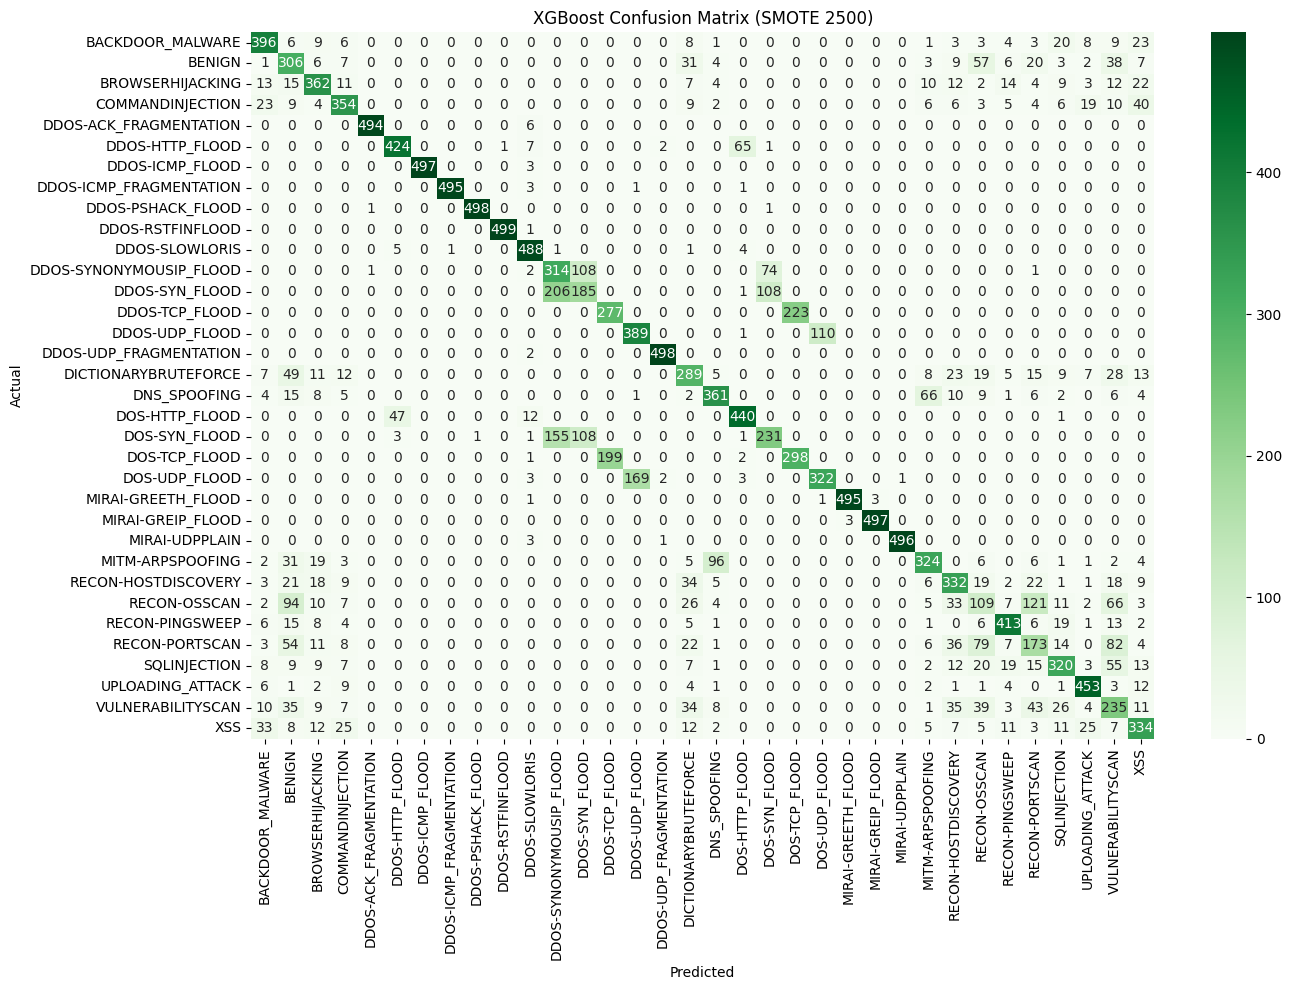

In [ ]:
# Importing the necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost SMOTE 1000

# Initializing the XGBoost classifier
xgboost_1000 = XGBClassifier(random_state = 42, n_estimators = 100, max_depth = 8)

# Training the XGBoost model on the training data and prediciting results on the testing set
xgboost_1000.fit(x_train_1000, y_train_1000)
y_pred_xgboost_1000 = xgboost_1000.predict(x_test_1000)

# Creating the classification report for the XGBoost model
print(classification_report(y_test_1000, y_pred_xgboost_1000, target_names = attack_names_1000))

# Creating the confusion matrix for XGBoost using sns.heatmap
confusion_matrix_xgboost_1000 = confusion_matrix(y_test_1000, y_pred_xgboost_1000)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_xgboost_1000, annot = True, fmt = 'd', cmap = 'Greens',
            xticklabels = attack_names_1000, yticklabels = attack_names_1000)
plt.title('XGBoost Confusion Matrix (SMOTE 1000)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


# XGBoost SMOTE 2500

# Initializing the XGBoost classifier
xgboost_2500 = XGBClassifier(random_state = 42, n_estimators = 100, max_depth = 8)

# Training the XGBoost model on the training data and prediciting results on the testing set
xgboost_2500.fit(x_train_2500, y_train_2500)
y_pred_xgboost_2500 = xgboost_2500.predict(x_test_2500)


# Creating the classification report for the XGBoost model
print(classification_report(y_test_2500, y_pred_xgboost_2500, target_names = attack_names_2500))


# Creating the confusion matrix for XGBoost using sns.heatmap
confusion_matrix_xgboost_2500 = confusion_matrix(y_test_2500, y_pred_xgboost_2500)
plt.figure(figsize = (14, 10))
sns.heatmap(confusion_matrix_xgboost_2500, annot = True, fmt = 'd', cmap = 'Greens',
            xticklabels = attack_names_2500, yticklabels = attack_names_2500)
plt.title('XGBoost Confusion Matrix (SMOTE 2500)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


Decision Tree SMOTE 1000: 0.62  
Random Forest SMOTE 1000: 0.66  
XGBoost SMOTE 1000: 0.67  

Decision Tree SMOTE 2500: 0.66  
Random Forest SMOTE 2500: 0.69  
XGBoost SMOTE 2500: 0.74  